# pandas exploration
In this assignment you will select a data set and do some munging and analysis of it using `pandas`, Jupyter Notebooks, and associated Python-centric data science tools.

## Set up environment

The following lines ensure that `numpy` and `pandas` are installed in the notebook environment.  Depending on your system, this may not be necessary and may be removed.

In [472]:
!pip install numpy
!pip install pandas

Import the core data science libraries:

In [473]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Import the raw data
In this section, you will import the raw data into a `pandas` DataFrame.

Below, I import my CSV file using the `pd.read_csv` function.

The link to my CSV from the NYC Open Data site is [here](https://data.cityofnewyork.us/Education/2005-2011-Graduation-Outcomes-School-Level-Gender/khqi-x3p3/about_data).

My dataset includes information about various schools in New York City, including the gender of students and various graduation rates.

In [474]:
# importing the csv file from my data folder
df = pd.read_csv("./data/grad-nyc-gender.csv")

## Data inspection
In this section, you will show enough of your data for a viewer to get a general sense of how the data is structured and any unique features of it.  Complete each of the indicated tasks in a Code cell, making sure to include a Markdown cell above each Code cell that explains what is being shown by the code.  
- Show 5 rows, selected at random, from the data set.
- Show each of the column names and their data types.
- Show any unique features of your chosen data set.

Feel free to add as many additional cells as you need to help explain the raw data.

Below shows 5 random rows from my dataset.

In [475]:
# shows 5 random rows from my dataset
df.sample(5)

,DBN,School Name,Cohort Year,Cohort Category,Demographic,Total Cohort Num,Total Grads Num,Total Grads Pct of cohort,Total Regents Num,Total Regents Pct of cohort,...,Regents w/o Advanced Num,Regents w/o Advanced Pct of cohort,Regents w/o Advanced Pct of grads,Local Num,Local Pct of cohort,Local Pct of grads,Still Enrolled Num,Still Enrolled Pct of cohort,Dropped Out Num,Dropped Out Pct of cohort
11767,21K400,LAFAYETTE HIGH SCHOOL,2002,5 Year,Female,212,126,59.40%,57,26.90%,...,44,20.80%,34.90%,69,32.50%,54.80%,21,9.90%,56,26.40%
2966,03M479,BEACON HIGH SCHOOL,2002,6 Year,Male,102,91,89.20%,61,59.80%,...,61,59.80%,67.00%,30,29.40%,33.00%,1,1.00%,6,5.90%
2440,02M605,HUMANITIES PREPARATORY ACADEMY,2002,6 Year,Female,15,s,s,s,s,...,s,s,s,s,s,s,s,s,s,s
15073,31R460,SUSAN E WAGNER HIGH SCHOOL,2005,4 Year August,Female,407,315,77.40%,232,57.00%,...,141,34.60%,44.80%,83,20.40%,26.30%,41,10.10%,15,3.70%
10301,17K528,HIGH SCHOOL FOR GLOBAL CITIZENSHIP (THE),2003,6 Year,Male,2,s,s,s,s,...,s,s,s,s,s,s,s,s,s,s


Here are the names of all the columns in my dataset and their data types. The majority are "objects" because they are strings. I will convert these in later cells.

In [476]:
# show each of the column names and their data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15518 entries, 0 to 15517
Data columns (total 24 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   DBN                                 15518 non-null  object
 1   School Name                         15518 non-null  object
 2   Cohort Year                         15518 non-null  int64 
 3   Cohort Category                     15518 non-null  object
 4   Demographic                         15518 non-null  object
 5   Total Cohort Num                    15518 non-null  int64 
 6   Total Grads Num                     15518 non-null  object
 7   Total Grads Pct of cohort           15518 non-null  object
 8   Total Regents Num                   15518 non-null  object
 9   Total Regents Pct of cohort         15518 non-null  object
 10  Total Regents Pct of grads          15498 non-null  object
 11  Advanced Regents Num                15518 non-null  ob

In my dataset, there are 467 unique schools.

In [477]:
# number of distinct schools = 467
len(df['School Name'].unique())

467

This is not evident on first glance since, as we can see below, the schools are repeated several times based on the Cohort Year, the gender of the students, etc.

In [478]:
df.head(10)

,DBN,School Name,Cohort Year,Cohort Category,Demographic,Total Cohort Num,Total Grads Num,Total Grads Pct of cohort,Total Regents Num,Total Regents Pct of cohort,...,Regents w/o Advanced Num,Regents w/o Advanced Pct of cohort,Regents w/o Advanced Pct of grads,Local Num,Local Pct of cohort,Local Pct of grads,Still Enrolled Num,Still Enrolled Pct of cohort,Dropped Out Num,Dropped Out Pct of cohort
0,01M056,CORLEARS SCHOOL,2001,4 Year June,Male,1,s,s,s,s,...,s,s,s,s,s,s,s,s,s,s
1,01M056,CORLEARS SCHOOL,2001,5 Year,Male,1,s,s,s,s,...,s,s,s,s,s,s,s,s,s,s
2,01M056,CORLEARS SCHOOL,2001,6 Year,Male,1,s,s,s,s,...,s,s,s,s,s,s,s,s,s,s
3,01M056,CORLEARS SCHOOL,2003,4 Year June,Male,1,s,s,s,s,...,s,s,s,s,s,s,s,s,s,s
4,01M056,CORLEARS SCHOOL,2003,5 Year,Male,1,s,s,s,s,...,s,s,s,s,s,s,s,s,s,s
5,01M056,CORLEARS SCHOOL,2003,6 Year,Male,1,s,s,s,s,...,s,s,s,s,s,s,s,s,s,s
6,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,2003,4 Year June,Female,1,s,s,s,s,...,s,s,s,s,s,s,s,s,s,s
7,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,2003,5 Year,Female,1,s,s,s,s,...,s,s,s,s,s,s,s,s,s,s
8,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,2003,6 Year,Female,1,s,s,s,s,...,s,s,s,s,s,s,s,s,s,s
9,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,2004,4 Year June,Female,28,18,64.30%,8,28.60%,...,8,28.60%,44.40%,10,35.70%,55.60%,9,32.10%,1,3.60%


The main columns of interest are "Demographic" with the students' gender and the graduation rate "Total Grads Pct of cohort". However, some of the columns also include data about students who took the Regents exams, which is an exam mandatory for high school students attending public schools in New York. This dataset may include public schools, but that information is not specified in the website that the dataset was pulled from.

## Data munging
Place your **data munging** code and documentation within this section.  
- Keep each of your Code cells short and focused on a single task.  
- Include a Markdown cell above each code cell that describes what task the code within the code cell is performing.
- Make as many code cells as you need to complete the munging - a few have been created for you to start with.
- Display 5 sample rows of the modified data after each transformation so a viewer can see how the data has changed.

**Note**: If you believe that your data set does not require any munging, please explain in detail.  Create Markdown cells that explain your thinking and create Code cells that show any specific structures of the data you refer to in your explanation.

#### WHAT I DID
- Change School Name to be in title format, not all upper case
- Remove rows that had "s" or "-" as missing values
- Convert all the "object" dtype columns to strings
- If percentage values had a percentage sign, I removed the percentage sign
- Convert all the numbers to floats or ints
- Create a column called "School Type" with whether the school is Co-Ed, All-Girls, or All-Boys

Overall, my dataset was fairly clean. But, I wanted to clean up some of the formatting, remove missing values, and a column indicating whether the school is co-ed, all-girls, or all-boys to clean up the "Demographic" column.

Firstly, I changed the school names to be in title format so that they're not entirely in upper case.

In [479]:
df["School Name"] = df["School Name"].apply(lambda x: x.title())

Below we see the title-formatted school names in the "School Name" column:

In [480]:
df.head()

,DBN,School Name,Cohort Year,Cohort Category,Demographic,Total Cohort Num,Total Grads Num,Total Grads Pct of cohort,Total Regents Num,Total Regents Pct of cohort,...,Regents w/o Advanced Num,Regents w/o Advanced Pct of cohort,Regents w/o Advanced Pct of grads,Local Num,Local Pct of cohort,Local Pct of grads,Still Enrolled Num,Still Enrolled Pct of cohort,Dropped Out Num,Dropped Out Pct of cohort
0,01M056,Corlears School,2001,4 Year June,Male,1,s,s,s,s,...,s,s,s,s,s,s,s,s,s,s
1,01M056,Corlears School,2001,5 Year,Male,1,s,s,s,s,...,s,s,s,s,s,s,s,s,s,s
2,01M056,Corlears School,2001,6 Year,Male,1,s,s,s,s,...,s,s,s,s,s,s,s,s,s,s
3,01M056,Corlears School,2003,4 Year June,Male,1,s,s,s,s,...,s,s,s,s,s,s,s,s,s,s
4,01M056,Corlears School,2003,5 Year,Male,1,s,s,s,s,...,s,s,s,s,s,s,s,s,s,s


Let us check the shape of the dataset before removing any missing values/rows. It has 15,518 rows.

In [481]:
# original shape of the dataset
df.shape

(15518, 24)

Using a `lambda` function, I find all the rows where there's a missing value marked as `s`, and remove using the apply function and `~`.

In [482]:
# remove all the schools that have "s" or "-" as missing values
df = df[~df.apply(lambda x: (x == "s")).any(axis=1)]

Here is the new output. We see the rows start at index 9 instead of 0 since the first several rows had missing values.

In [483]:
df.head()

,DBN,School Name,Cohort Year,Cohort Category,Demographic,Total Cohort Num,Total Grads Num,Total Grads Pct of cohort,Total Regents Num,Total Regents Pct of cohort,...,Regents w/o Advanced Num,Regents w/o Advanced Pct of cohort,Regents w/o Advanced Pct of grads,Local Num,Local Pct of cohort,Local Pct of grads,Still Enrolled Num,Still Enrolled Pct of cohort,Dropped Out Num,Dropped Out Pct of cohort
9,01M292,Henry Street School For International Studies,2004,4 Year June,Female,28,18,64.30%,8,28.60%,...,8,28.60%,44.40%,10,35.70%,55.60%,9,32.10%,1,3.60%
10,01M292,Henry Street School For International Studies,2004,5 Year,Female,30,19,63.30%,8,26.70%,...,8,26.70%,42.10%,11,36.70%,57.90%,2,6.70%,8,26.70%
11,01M292,Henry Street School For International Studies,2004,6 Year,Female,28,20,71.40%,8,28.60%,...,8,28.60%,40.00%,12,42.90%,60.00%,1,3.60%,7,25.00%
12,01M292,Henry Street School For International Studies,2005,4 Year June,Female,25,20,80.00%,13,52.00%,...,13,52.00%,65.00%,7,28.00%,35.00%,-,0.00%,5,20.00%
13,01M292,Henry Street School For International Studies,2005,4 Year August,Female,25,20,80.00%,13,52.00%,...,13,52.00%,65.00%,7,28.00%,35.00%,-,0.00%,5,20.00%


Here we check the new size. We now have 13,245 rows. A large amount of rows was removed, but overall not too much data loss.

In [484]:
df.shape
# check new size.

(13245, 24)

Now we repeat the same removal method of missing values using the `lambda` function, but removing `-` values.

In [485]:
df = df[~df.apply(lambda x: (x == " -   ")).any(axis=1)] # remove "-"

We check the size again. We now have 6676 rows. Over half of the rows were removed due to this. This is a significant amount of data loss. 

In [486]:
df.shape 
# check new size.

(6676, 24)

But as we see here, there are still 319 unique schools in our dataset out of 467. So while we lost a lot of data, we still have the majority of schools in our dataset to analyze.

In [487]:
len(df['School Name'].unique())
# majority of schools still in our dataset. significant loss of data, but let's analyze from here

319

Now we convert all the data types of the columns that were of "object" type to strings to make sure they are all in string format.

In [488]:
# convert all columns but the two integer ones to strings
df.iloc[:,:2] = df.iloc[:,:2].astype(str)
df.iloc[:, 3:5] = df.iloc[:, 3:5].astype(str)
df.iloc[:, 6:] = df.iloc[:, 6:].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6676 entries, 38 to 15471
Data columns (total 24 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   DBN                                 6676 non-null   object
 1   School Name                         6676 non-null   object
 2   Cohort Year                         6676 non-null   int64 
 3   Cohort Category                     6676 non-null   object
 4   Demographic                         6676 non-null   object
 5   Total Cohort Num                    6676 non-null   int64 
 6   Total Grads Num                     6676 non-null   object
 7   Total Grads Pct of cohort           6676 non-null   object
 8   Total Regents Num                   6676 non-null   object
 9   Total Regents Pct of cohort         6676 non-null   object
 10  Total Regents Pct of grads          6676 non-null   object
 11  Advanced Regents Num                6676 non-null   ob

Here, I created a list with all of the columns that had numbers that were of "object" type because they had `%` signs in them. We strip all the numbers of the percentage sign and convert them to floats, all using the `lambda` and `astype` functions and a for loop.

In [489]:
pct_cols = ["Total Grads Pct of cohort", "Total Regents Pct of cohort", "Total Regents Pct of grads", "Advanced Regents Pct of cohort", "Advanced Regents Pct of grads", "Regents w/o Advanced Pct of cohort", "Regents w/o Advanced Pct of grads", "Local Pct of cohort", "Local Pct of grads", "Still Enrolled Pct of cohort", "Dropped Out Pct of cohort"]
for c in pct_cols:
    col_convert = df.loc[:, c]
    col_convert = col_convert.apply(lambda x: x.strip("%"))
    df.loc[:, c] = col_convert.astype(float)

I created another list with all of the columns that had numbers with no percentage signs that should just be integers but were still "object" types. I convert them here using the `astype` function.

In [490]:
int_cols = ["Total Grads Num", "Total Regents Num", "Advanced Regents Num", "Regents w/o Advanced Num", "Local Num", "Still Enrolled Num","Dropped Out Num"]
df.loc[:, int_cols] = df.loc[:, int_cols].astype(int)

We now see all the data types are in their correct formats.

In [491]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6676 entries, 38 to 15471
Data columns (total 24 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   DBN                                 6676 non-null   object 
 1   School Name                         6676 non-null   object 
 2   Cohort Year                         6676 non-null   int64  
 3   Cohort Category                     6676 non-null   object 
 4   Demographic                         6676 non-null   object 
 5   Total Cohort Num                    6676 non-null   int64  
 6   Total Grads Num                     6676 non-null   int64  
 7   Total Grads Pct of cohort           6676 non-null   float64
 8   Total Regents Num                   6676 non-null   int64  
 9   Total Regents Pct of cohort         6676 non-null   float64
 10  Total Regents Pct of grads          6676 non-null   float64
 11  Advanced Regents Num                6676 

We can see how the numbers look like now below:

In [492]:
df.head()

,DBN,School Name,Cohort Year,Cohort Category,Demographic,Total Cohort Num,Total Grads Num,Total Grads Pct of cohort,Total Regents Num,Total Regents Pct of cohort,...,Regents w/o Advanced Num,Regents w/o Advanced Pct of cohort,Regents w/o Advanced Pct of grads,Local Num,Local Pct of cohort,Local Pct of grads,Still Enrolled Num,Still Enrolled Pct of cohort,Dropped Out Num,Dropped Out Pct of cohort
38,01M448,University Neighborhood High School,2001,4 Year June,Female,27,19,70.4,15,55.6,...,13,48.1,68.4,4,14.8,21.1,5,18.5,1,3.7
41,01M448,University Neighborhood High School,2002,4 Year June,Female,29,19,65.5,11,37.9,...,7,24.1,36.8,8,27.6,42.1,8,27.6,1,3.4
42,01M448,University Neighborhood High School,2002,5 Year,Female,29,24,82.8,12,41.4,...,8,27.6,33.3,12,41.4,50.0,2,6.9,2,6.9
43,01M448,University Neighborhood High School,2002,6 Year,Female,29,24,82.8,12,41.4,...,8,27.6,33.3,12,41.4,50.0,2,6.9,2,6.9
44,01M448,University Neighborhood High School,2003,4 Year June,Female,45,42,93.3,21,46.7,...,14,31.1,33.3,21,46.7,50.0,1,2.2,2,4.4


Finally, I created a `School Type` column using a for loop and filtering to separate the schools into `Co-Ed`, `All-Girls`, and `All-Boys` based on their `Demographic` column.

In [493]:
# filter schools for if they are co-ed, all boys, or all girls in a "School Type" column
unique_schools = df["School Name"].unique()

for s in unique_schools:
    demographics = df[df['School Name'] == s]["Demographic"].unique()
    if ("Male" in demographics) and ("Female" in demographics):
        df.loc[df['School Name'] == s, "School Type"] = "Co-Ed"
    elif demographics == "Male":
        df.loc[df['School Name'] == s, "School Type"] = "All-Boys"
    elif demographics == "Female":
        df.loc[df['School Name'] == s, "School Type"] = "All-Girls"

,DBN,School Name,Cohort Year,Cohort Category,Demographic,Total Cohort Num,Total Grads Num,Total Grads Pct of cohort,Total Regents Num,Total Regents Pct of cohort,...,Regents w/o Advanced Pct of cohort,Regents w/o Advanced Pct of grads,Local Num,Local Pct of cohort,Local Pct of grads,Still Enrolled Num,Still Enrolled Pct of cohort,Dropped Out Num,Dropped Out Pct of cohort,School Type
38,01M448,University Neighborhood High School,2001,4 Year June,Female,27,19,70.4,15,55.6,...,48.1,68.4,4,14.8,21.1,5,18.5,1,3.7,Co-Ed
41,01M448,University Neighborhood High School,2002,4 Year June,Female,29,19,65.5,11,37.9,...,24.1,36.8,8,27.6,42.1,8,27.6,1,3.4,Co-Ed
42,01M448,University Neighborhood High School,2002,5 Year,Female,29,24,82.8,12,41.4,...,27.6,33.3,12,41.4,50.0,2,6.9,2,6.9,Co-Ed
43,01M448,University Neighborhood High School,2002,6 Year,Female,29,24,82.8,12,41.4,...,27.6,33.3,12,41.4,50.0,2,6.9,2,6.9,Co-Ed
44,01M448,University Neighborhood High School,2003,4 Year June,Female,45,42,93.3,21,46.7,...,31.1,33.3,21,46.7,50.0,1,2.2,2,4.4,Co-Ed


Here is the final dataset:

In [512]:
df.head()

,DBN,School Name,Cohort Year,Cohort Category,Demographic,Total Cohort Num,Total Grads Num,Total Grads Pct of cohort,Total Regents Num,Total Regents Pct of cohort,...,Regents w/o Advanced Pct of cohort,Regents w/o Advanced Pct of grads,Local Num,Local Pct of cohort,Local Pct of grads,Still Enrolled Num,Still Enrolled Pct of cohort,Dropped Out Num,Dropped Out Pct of cohort,School Type
38,01M448,University Neighborhood High School,2001,4 Year June,Female,27,19,70.4,15,55.6,...,48.1,68.4,4,14.8,21.1,5,18.5,1,3.7,Co-Ed
41,01M448,University Neighborhood High School,2002,4 Year June,Female,29,19,65.5,11,37.9,...,24.1,36.8,8,27.6,42.1,8,27.6,1,3.4,Co-Ed
42,01M448,University Neighborhood High School,2002,5 Year,Female,29,24,82.8,12,41.4,...,27.6,33.3,12,41.4,50.0,2,6.9,2,6.9,Co-Ed
43,01M448,University Neighborhood High School,2002,6 Year,Female,29,24,82.8,12,41.4,...,27.6,33.3,12,41.4,50.0,2,6.9,2,6.9,Co-Ed
44,01M448,University Neighborhood High School,2003,4 Year June,Female,45,42,93.3,21,46.7,...,31.1,33.3,21,46.7,50.0,1,2.2,2,4.4,Co-Ed


## Data analysis
Place your **data analysis** code and documentation within this section.
- Perform at least 5 different statistical or other analyses of different aspects of the data.
    - Your analyses must be specific and relevant to your chosen data set and show interesting aspects of it.
    - Include at least one analysis that includes grouping rows by a shared attribute and performing some kind of statistical analysis on each group.
    - Sort the data in at least 1 of your analyses, but sort on its own does not constitute an analysis on its own.
- Keep each of your Code cells short and focused on a single task.
- Include a Markdown cell above each Code cell that describes what task the code within the Code cell is performing.
- Make as many code cells as you need to complete the analysis - a few have been created for you to start with.

#### MY 5 ANALYSES
- Overall mean graduation rate per school, sorted in descending order, showing only the top 10.
- Mean graduation rate per "School Type" (co-ed, all-girls, all-boys).
- Number of schools which are All-Girls and have a graduation rate above 80%.


- Graduation rates for boys at all boys schools vs coed schools, sorted in descending order, showing the top 20.
- Graduation rates for girls at all girls schools vs coed schools, sorted in descending order, showing the top 20.


- Dropout rates for boys at all boys schools vs coed schools, sorted in ascending order.
- Dropout rates for girls at all girls schools vs coed schools, sorted in ascending order.

In [494]:
# mean graduation rate per school: descending order, top 10
df.groupby("School Name")['Total Grads Pct of cohort'].mean().sort_values(ascending = False).head(10)

School Name
Baruch College Campus High School                     97.000000
Fiorello H Laguardia High School Of Music             96.604167
Brooklyn Technical High School                        95.642857
Queens Gateway To Health Sciences Secondary School    94.420000
Marie Curie High Sch-Nursing, Medicine & Applied H    93.800000
Frank Sinatra School Of The Arts High School          93.666667
Nyc Lab High School For Collaborative Studies         93.066667
Knowledge And Power Prep Academy International Hig    92.900000
Benjamin Banneker Academy                             92.671429
Young Women'S Leadership School Of Queens             92.100000
Name: Total Grads Pct of cohort, dtype: float64

In [495]:
# mean graduation rate per School Type
df.groupby("School Type")[ "Total Grads Pct of cohort" ].mean()

School Type
All-Boys     67.210390
All-Girls    69.843802
Co-Ed        67.414418
Name: Total Grads Pct of cohort, dtype: float64

In [496]:
# number of schools which are All-Girls and have a graduation rate above 80%
num_allGirls_highRate = df[(df["School Type"] == "All-Girls") & (df["Total Grads Pct of cohort"] > 80)]["School Name"].unique()
len(num_allGirls_highRate)

18

In [497]:
# graduation rate for boys at all boys schools vs coed
# graduation rate for girls at all girls schools vs coed

# boys at Co-Ed schools total graduation rate
boysCoed_gradRate = df[(df["School Type"] == "Co-Ed") & (df["Demographic"] == "Male")][["School Name", "Total Grads Pct of cohort"]]
boysCoed_gradRate.groupby("School Name")["Total Grads Pct of cohort"].mean().sort_values(ascending = False).head(20)

School Name
Brooklyn Technical High School                        94.800000
Fiorello H Laguardia High School Of Music             93.400000
Knowledge And Power Prep Academy International Hig    92.550000
Nyc Lab High School For Collaborative Studies         92.050000
Millennium High School                                91.700000
It Takes A Village Academy                            91.200000
Bedford Academy High School                           91.183333
Frank Sinatra School Of The Arts High School          91.075000
Theatre Arts Production Company School                90.600000
Benjamin Banneker Academy                             89.971429
Brooklyn College Academy                              89.477778
Csi High School For International Studies             89.250000
Bronx High School For Medical Science                 88.900000
Pace High School                                      88.875000
Leon M Goldstein High School For The Sciences         88.792308
Professional Performing Arts

In [498]:
# boys at All-Boys schools total graduation rate
boysBoys_gradRate = df[df["School Type"] == "All-Boys"][["School Name", "Total Grads Pct of cohort"]]
boysBoys_gradRate.groupby("School Name")["Total Grads Pct of cohort"].mean().sort_values(ascending = False).head(20)

School Name
High Sch-Construction, Trades, Engineering & Archi    91.733333
Baccalaureate School For Global Education             90.900000
All City Leadership Secondary School                  89.600000
Bronx Aerospace High School                           87.500000
Urban Assembly School For Applied Math And Science    87.500000
Manhattan/Hunter Science High School                  86.760000
High School Of Computers And Technology               84.466667
High School Of Sports Management                      78.916667
Urban Assembly School Of Design And Construction      73.660000
Eagle Academy For Young Men                           70.880000
Urban Assembly Academy Of Government And Law          68.360000
Bronx Lab School                                      65.100000
Coalition School For Social Change                    60.550000
Bronx Coalition Community High School                 55.125000
Automotive High School                                52.880000
Pablo Neruda Academy For Arc

In [499]:
# girls at Co-Ed schools total graduation rate
girlsCoed_gradRate = df[(df["School Type"] == "Co-Ed") & (df["Demographic"] == "Female")][["School Name", "Total Grads Pct of cohort"]]
girlsCoed_gradRate.groupby("School Name")["Total Grads Pct of cohort"].mean().sort_values(ascending = False).head(20)

School Name
Brooklyn Technical High School                        98.733333
Fiorello H Laguardia High School Of Music             97.923529
Bedford Academy High School                           96.000000
Frank Sinatra School Of The Arts High School          95.740000
Benjamin Banneker Academy                             95.371429
Nyc Lab High School For Collaborative Studies         95.100000
Csi High School For International Studies             95.100000
Thomas A Edison Career And Technical High School      94.200000
Channel View School For Research                      93.400000
Knowledge And Power Prep Academy International Hig    93.250000
Brooklyn College Academy                              93.244444
Academy Of Finance And Enterprise                     93.175000
Talent Unlimited High School                          93.100000
Manhattan Village Academy                             92.925000
Astor Collegiate Academy                              91.925000
Academy Of American Studies 

In [500]:
# girls at All-Girls schools total graduation rate
girlsGirls_gradRate = df[df["School Type"] == "All-Girls"][["School Name", "Total Grads Pct of cohort"]]
girlsGirls_gradRate.groupby("School Name")["Total Grads Pct of cohort"].mean().sort_values(ascending = False).head(20)

School Name
Baruch College Campus High School                     97.000000
Queens Gateway To Health Sciences Secondary School    94.420000
Marie Curie High Sch-Nursing, Medicine & Applied H    93.800000
Young Women'S Leadership School Of Queens             92.100000
The Bronx Preparatory Academy                         90.000000
East-West School Of International Studies             87.900000
Bronx Health Sciences High School                     87.300000
Academy For Social Action-A College Board School      86.350000
Liberation Diploma Plus                               85.700000
Repertory Company High School For Theatre Arts        82.100000
Women'S Academy Of Excellence                         80.266667
High School For Violin And Dance                      79.242857
Central Park East High School                         78.550000
Bronx International High School                       78.400000
Urban Assembly School Of Business For Young Women     77.500000
Performing Arts And Technolo

In [501]:
# dropped out percentages of boys at Co-Ed: 266 schools
boysCoed_dropRate = df[(df["School Type"] == "Co-Ed") & (df["Demographic"] == "Male")][["School Name", "Dropped Out Pct of cohort"]]
boysCoed_dropRate.groupby("School Name")["Dropped Out Pct of cohort"].mean().sort_values(ascending = True).head(20)
#len(boysCoed_dropRate["School Name"].unique())

School Name
Brooklyn Technical High School                        1.336364
The Michael J Petrides School                         1.600000
Fiorello H Laguardia High School Of Music             1.728571
Nyc Lab High School For Collaborative Studies         2.033333
Frank Sinatra School Of The Arts High School          2.100000
Knowledge And Power Prep Academy International Hig    2.100000
Victory Collegiate High School                        2.300000
Bronx High School For Medical Science                 2.800000
Theatre Arts Production Company School                3.100000
New School For Arts And Sciences                      3.150000
Manhattan Village Academy                             3.250000
Pace High School                                      3.500000
Professional Performing Arts High School              3.500000
Marble Hill High School Of International Studies      3.533333
Brooklyn College Academy                              3.566667
Pathways College Preparatory School        

In [502]:
# dropped out percentages of boys at All-Boys: 21 schools
boysBoys_dropRate = df[df["School Type"] == "All-Boys"][["School Name", "Dropped Out Pct of cohort"]]
boysBoys_dropRate.groupby("School Name")["Dropped Out Pct of cohort"].mean().sort_values(ascending = True)
# len(boysBoys_dropRate["School Name"].unique())

School Name
High Sch-Construction, Trades, Engineering & Archi     1.300000
Manhattan/Hunter Science High School                   3.340000
Bronx Aerospace High School                            3.600000
All City Leadership Secondary School                   4.200000
Baccalaureate School For Global Education              4.500000
Urban Assembly School For Applied Math And Science     5.000000
High School Of Computers And Technology                6.916667
Urban Assembly School Of Design And Construction       8.580000
Eagle Academy For Young Men                            8.680000
High School Of Sports Management                      11.616667
Pan American International High School                12.000000
Bronx Lab School                                      12.100000
Facing History School (The)                           16.300000
Urban Assembly Academy Of Government And Law          16.360000
Bronx Coalition Community High School                 21.000000
Coalition School For Social 

In [503]:
# dropped out percentages of girls at Co-Ed: 266 schools
girlsCoed_dropRate = df[(df["School Type"] == "Co-Ed") & (df["Demographic"] == "Female")][["School Name", "Dropped Out Pct of cohort"]]
girlsCoed_dropRate.groupby("School Name")["Dropped Out Pct of cohort"].mean().sort_values(ascending = True).head(20)
#len(girlsCoed_dropRate["School Name"].unique())

School Name
Brooklyn Technical High School                        0.633333
Fiorello H Laguardia High School Of Music             0.735294
Urban Assembly School For Law And Justice             1.200000
Hs For Public Service-Heroes Of Tomorrow              1.200000
Millennium High School                                1.500000
Knowledge And Power Prep Academy International Hig    1.500000
Frank Sinatra School Of The Arts High School          1.580000
Benjamin Banneker Academy                             1.585714
Csi High School For International Studies             1.600000
Nyc Lab High School For Collaborative Studies         1.700000
Thurgood Marshall Academy For Learning & Social Ch    1.900000
Bronx Center For Science And Mathematics              2.000000
Bedford Academy High School                           2.000000
World Journalism Preparatory                          2.000000
Brooklyn College Academy                              2.022222
Frederick Douglas Academy Iii Secondary Sch

In [504]:
# dropped out percentages of girls at All-Girls: 32 schools
girlsGirls_dropRate = df[df["School Type"] == "All-Girls"][["School Name", "Dropped Out Pct of cohort"]]
girlsGirls_dropRate.groupby("School Name")["Dropped Out Pct of cohort"].mean().sort_values(ascending = True)
# len(girlsGirls_dropRate["School Name"].unique())

School Name
Baruch College Campus High School                      1.500000
Young Women'S Leadership School Of Queens              1.800000
Queens Gateway To Health Sciences Secondary School     2.020000
Academy For Social Action-A College Board School       3.000000
East-West School Of International Studies              3.000000
Marie Curie High Sch-Nursing, Medicine & Applied H     3.100000
Liberation Diploma Plus                                3.600000
The Bronx Preparatory Academy                          5.000000
Central Park East High School                          6.400000
Academy For Language And Technology                    6.700000
Repertory Company High School For Theatre Arts         7.100000
Validus Preparatory Academy                            7.700000
Bronx Health Sciences High School                      8.650000
High School For Violin And Dance                       9.857143
Juan Morel Campos Secondary School                    10.033333
Academy Of Hospitality And T

## Data visualization
In this section, you will create a few **visualizations** that show some of the insights you have gathered from this data.
- Create at least 5 different visualizations, where each visualization shows different insights into the data.
- Use at least 3 different visualization types (e.g. bar charts, line charts, stacked area charts, pie charts, etc)
- Create a Markdown cell and a Code cell for each, where you explain and show the visualizations, respectively.
- Create as many additional cells as you need to prepare the data for the visualizations.

#### MY 5 VISUALIZATIONS
- (Time Series plot) Graduation rate at Laguardia High School over time.
- (Time Series plot) Drop out rate at Far Rockaway High School over time.
- (Side-by-side Bar Chart) Boys vs Girls at Coed schools, average graduation rate over time.
- (Pie Chart) Advanced Regents Percent of Cohort by school type.
- (Horizontal Bar Chart) top 20 all-girls schools by graduation rate

In [505]:
gradRateOverTime = df[df["School Name"] == "Fiorello H Laguardia High School Of Music"][["School Name", "Demographic", "Cohort Year", "Total Grads Pct of cohort"]]
lagHighRates = gradRateOverTime.groupby("Cohort Year")["Total Grads Pct of cohort"].mean().sort_values(ascending = True)
#gradRateOverTime.sort_values(by = "Cohort Year", ascending = True)
lagHighRates.sort_index(ascending = True)
#type(lagHighRates)

Cohort Year
2001    93.260000
2002    96.675000
2003    98.450000
2004    97.933333
2005    97.350000
2006    97.316667
2007    98.100000
Name: Total Grads Pct of cohort, dtype: float64

Text(0.5, 1.0, 'Graduation Rate Over Time at Laguardia High School Of Music')

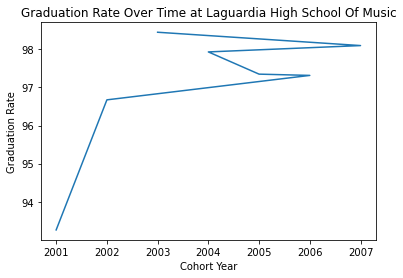

In [506]:
lagHighRates.plot(ylabel = "Graduation Rate")
plt.title("Graduation Rate Over Time at Laguardia High School Of Music")

In [507]:
dropRateOverTime = df[df["School Name"] == "Far Rockaway High School"][["School Name", "Demographic", "Cohort Year", "Dropped Out Pct of cohort"]]
dropRates = petridesDropRateOverTime.groupby("Cohort Year")["Dropped Out Pct of cohort"].mean().sort_values(ascending = True)
#petridesRateOverTime.sort_values(by = "Cohort Year", ascending = True)
dropRates.sort_index(ascending = True)
#type(dropRates)
#Far Rockaway High School

Cohort Year
2001    32.300000
2002    34.100000
2003    33.816667
2004    32.360000
2005    22.850000
2007    23.200000
Name: Dropped Out Pct of cohort, dtype: float64

(20.0, 35.0)

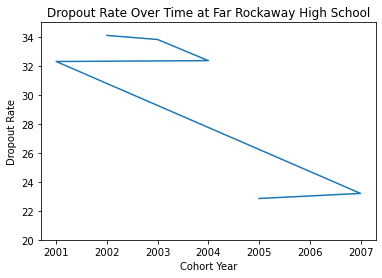

In [508]:
dropRates.plot(ylabel= "Dropout Rate")
plt.title("Dropout Rate Over Time at Far Rockaway High School")
plt.ylim(20, 35)

Text(0.5, 1.0, 'Graduation Rates in Co-Ed Schools')

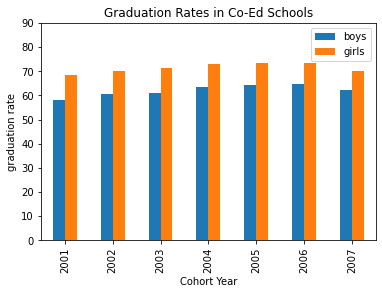

In [509]:
boys = df[(df["School Type"] == "Co-Ed") & (df["Demographic"]== "Male")][["School Name", "Cohort Year", "Demographic", "Total Grads Pct of cohort"]]
girls = df[(df["School Type"] == "Co-Ed") & (df["Demographic"]== "Female")][["School Name", "Cohort Year", "Demographic", "Total Grads Pct of cohort"]]
b = boys.groupby("Cohort Year")["Total Grads Pct of cohort"].mean()
g = girls.groupby("Cohort Year")["Total Grads Pct of cohort"].mean()

combined = pd.DataFrame({
    "boys": b,
    "girls": g
})
combined.plot.bar(ylabel = "graduation rate")
plt.ylim(0,90)
plt.title("Graduation Rates in Co-Ed Schools")

<AxesSubplot:ylabel='Advanced Regents Pct of cohort'>

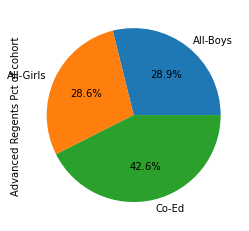

In [510]:
# Advanced Regents percent of cohort by school type
advRegSchoolTypeGrad = df.groupby("School Type")["Advanced Regents Pct of cohort"].mean()
advRegSchoolTypeGrad.plot.pie(y = "School Type", autopct="%1.1f%%", legend = False)

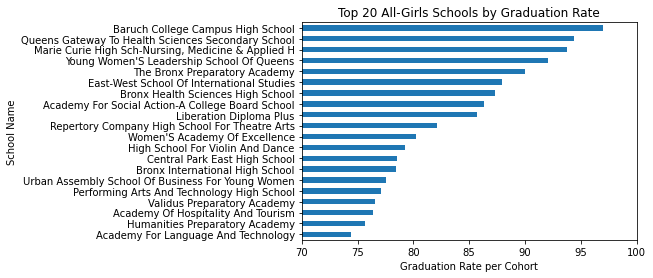

In [511]:
# girls at All-Girls schools total graduation rate, horizontal bar chart
girls_schools = df[df["School Type"] == "All-Girls"][["School Name", "Total Grads Pct of cohort"]]
grouped_grad_rate = girls_schools.groupby("School Name")["Total Grads Pct of cohort"].mean().sort_values(ascending=False).head(20)

grouped_grad_rate[::-1].plot.barh()

plt.title("Top 20 All-Girls Schools by Graduation Rate")
plt.xlabel("Graduation Rate per Cohort")
plt.ylabel("School Name")
plt.xlim(70, 100)
plt.show()